In [1]:
# --- SECTION 1 ---
# Libraries and data loading
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import numpy as np

diabetes = load_diabetes()

train_size = 400
train_x, train_y = diabetes.data[:train_size], diabetes.target[:train_size]
test_x, test_y = diabetes.data[train_size:], diabetes.target[train_size:]

np.random.seed(123456)

In [2]:
# --- SECTION 2 ---
# Create the ensemble
ensemble_size = 200
learning_rate = 0.1
ensemble = GradientBoostingRegressor(n_estimators=ensemble_size,
                                    learning_rate=learning_rate)

In [3]:
# --- SECTION 3 ---
# Evaluate the ensemble
ensemble.fit(train_x, train_y)
predictions = ensemble.predict(test_x)

Gradient Boosting:
R-squared: 0.44
MSE: 3113.43


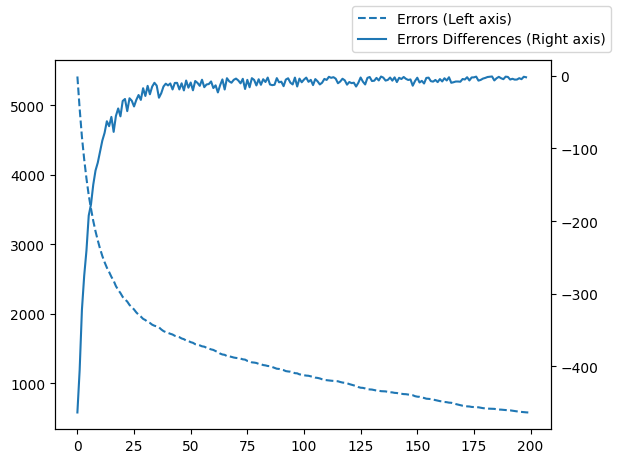

In [4]:
# --- SECTION 4 ---
# Print the metrics
r2 = metrics.r2_score(test_y, predictions)
mse = metrics.mean_squared_error(test_y, predictions)

print('Gradient Boosting:')
print('R-squared: %.2f' % r2)
print('MSE: %.2f' % mse)

import matplotlib.pyplot as plt
diffs = [ensemble.train_score_[i] - ensemble.train_score_[i-1] for i in range(1, len(ensemble.train_score_))]

fig, ax1 = plt.subplots()
ax1.plot(ensemble.train_score_, linestyle='--', label='Errors (Left axis)')

ax2 = ax1.twinx()
ax2.plot(diffs, label='Errors Differences (Right axis)')
fig.legend()